Importing the necessary packages

In [ ]:
import numpy as np
import math
from functools import reduce
from copy import deepcopy
import matplotlib.pyplot as plt

****Necessary functions of the quantum simulator**

The basis of the qubit system

In [ ]:
qubit01 = {0: np.array([1 , 0 ]),1: np.array([0 , 1])}

Tensor of the qubit system

In [ ]:
#translation of the qubit system into a common vector
#input(list) - list of qubits(0 or 1)
def tensorqubit(list):
  q = reduce((lambda x,y: np.kron(x,y)), list)
  return q

In [ ]:
H = np.array([[1/math.sqrt(2),1/math.sqrt(2)],[1/math.sqrt(2),-1/math.sqrt(2)]])
X = np.array([[0,1],[1,0]])
I = np.array([[1,0],[0,1]])

i номер кубита в битовую запись размера n



In [ ]:
# Translation of the i qubit by count into a bit record of size n
# Input (n) is the number of qubits, (i) is the number of qubits 
# int output bit entry
def inttobit(n, i):
    return list(map(int, list(format(i, "0{0}b".format(n)))))

CNOT function for the n qubit system (controlling, controlled, n qubit){for toffoli, you still need to write a loop inside}

In [ ]:
# Finds the CNOT matrix in the n qubit system
# Input: (q1) is the number of the controlling qubit, (q2) is the number of the controlled qubit, (n) is the total qubit in the system  
# Output is a 4*4 matrix (so far without the complex part)
def CNOT(q1, q2, n):
  matrixCNOT = np.zeros((2 ** n, 2 ** n))
  for i in range(2 ** n):
    binary = inttobit(n, i)
    matrixCNOT[:, i] =reduce(np.kron, [
        [qubit01[k]] if j != q2 else qubit01[((binary[q1 - 1])^ (binary[q2 - 1]))] \
        for j, k in enumerate(binary, start=1)])
  return matrixCNOT

step function, but through a sheet (there were problems translating tuple so I had to change the function a little)

In [ ]:
# Finds the matrix of unitary operators of the i-th step
# Input - A list of unitary operators in this step (List)
# The output is the matrix of such a step n**2 * n**2
def UnitStep(list):
  Step_i = reduce((lambda x,y: np.kron(x,y)), list)
  return Step_i

the function of the chain, but through the sheet (there were problems translating tuple, so I had to change the function a little)

In [ ]:
# Transformation of the qubit system after the gate chain
# # Input (Steps number) - the number of steps in the chain, (qubitsstart) - the initial state of the qubit,(list) - the list of the general transformation matrix at the i-th step
# Output - The state of the qubits after passing the chain (vector n**2)
def Chainqubit(qubitsstart, list):
  for i in range(len(list)):
    qubitsstart = list[i].dot(qubitsstart)
  return qubitsstart

n hadamard gates

In [ ]:
def Hn(n):
  H_n = []
  for i  in range(n):
    H_n.append(H)
  return UnitStep(H_n)

**Bernstein-Vasinari algorithm**

Determines the required number of qubits, s(010100) - bit string key in the Bernstein-Vasinari algorithm

In [ ]:
s = list(input())
m1 = np.array([1, 0])
m2 = np.array([0, 1])
systemQubit = []
for i in range(len(s)):
  systemQubit.append(m1)
systemQubit.append(m2)

10011


The general vector of the system

In [ ]:
qubit = tensorqubit(systemQubit)

The Oracle of the algorithm

In [ ]:
def OraculBershtein(s):
  Oracul =[]
  for i in range(len(s)):
    if s[len(s)-i-1] == '1':
      Oracul.append(CNOT(i+1,len(s)+1,len(s)+1))
  return Oracul

The chain of the entire system, the output of a secret line in one appeal

In [ ]:
Bershtein = []
Bershtein.append(Hn(len(s)+1))
OraculBershteinVizari = OraculBershtein(s)
for i in range(len(OraculBershteinVizari)):
  Bershtein.append(OraculBershteinVizari[i])
Bershtein.append(np.kron(Hn(len(s)),I))
b = Chainqubit(qubit, Bershtein)
b=b*b
indexnonzerow = np.where(b > 0.001)
print(((bin(indexnonzerow[0][0])[2:].zfill(len(s)+1))[:len(s)])[::-1])
print(((bin(indexnonzerow[0][1])[2:].zfill(len(s)+1))[:len(s)])[::-1])


10011
10011


In [ ]:
binstr = []
for i in range(2**(len(s)+1)):
  byt = bin(i)[2:].zfill(len(s)+1)
  byt = byt[::-1]
  binstr.append(byt)

Probability distribution for each state

<BarContainer object of 64 artists>

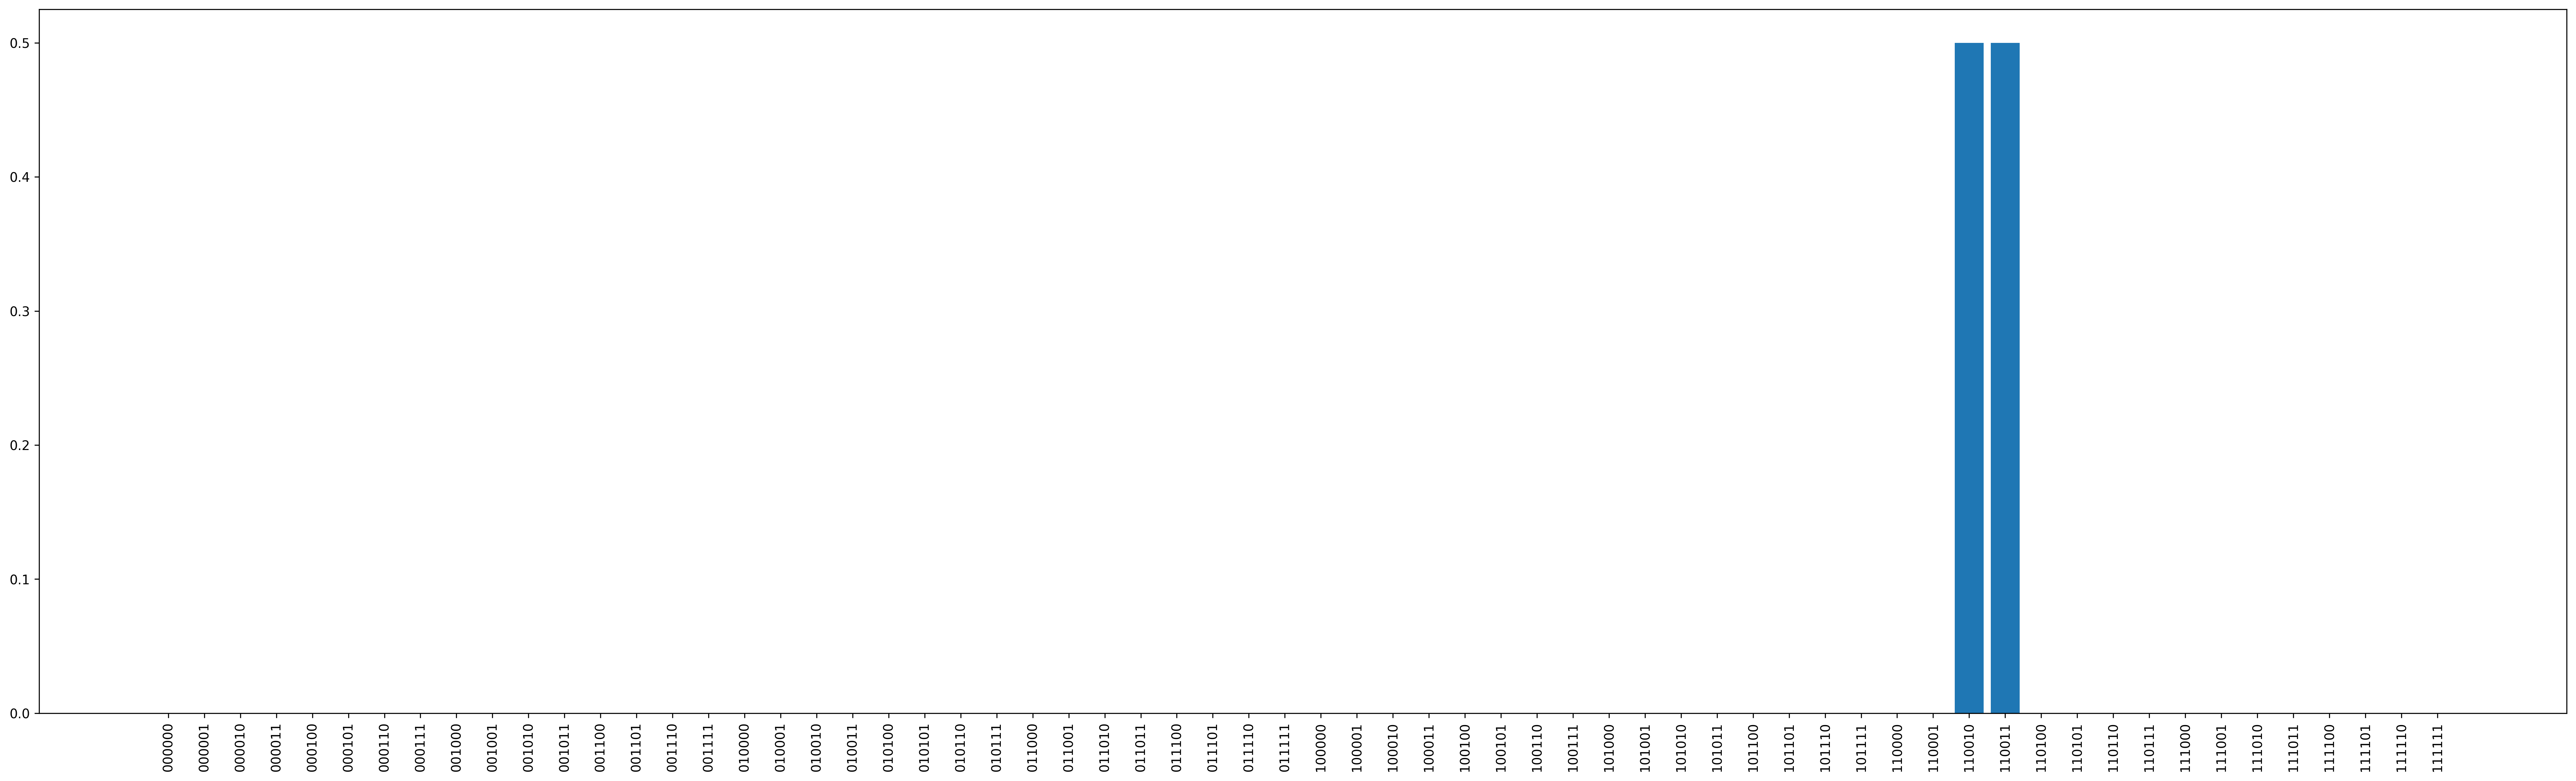

In [ ]:
plt.figure(figsize= (35,10), dpi= (300))
plt.xticks(rotation=90)
plt.bar(binstr, b)